# Session 8: Manipulating Data (with Solutions)

## 1. Descriptive Statistics

In [2]:
import pandas as pd
sales=pd.read_csv('RalphsIRI-cleaned.csv.gz')
sales.head()

,week,GTIN,description,ounces,revenue,sold,average_price
0,2017-12-31,28400596001,CHESTERS CORN & POTATO SNACK FLAMIN HOT,5.500,9763.00,4882,1.999795
1,2017-12-31,28400087691,CHESTERS CORN & POTATO SNACK FLAMIN HOT,1.125,77.50,155,0.500000
2,2017-12-31,28400437741,CHESTERS CORN & POTATO SNACK FLAMIN HOT,4.000,2834.13,1677,1.690000
3,2017-12-31,28400190801,SABRITONES WHEAT SNACK CHILI & LIME,4.250,446.00,223,2.000000
4,2017-12-31,28400183902,CHEETOS CHEESE SNACK CHEESE 50% LESS FAT,7.625,1872.30,572,3.273252


In [6]:
sales.shape

(14129, 7)

In [7]:
len(sales)

14129

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14129 entries, 0 to 14128
Data columns (total 7 columns):
week             14129 non-null object
GTIN             14129 non-null int64
description      14129 non-null object
ounces           14078 non-null float64
revenue          14129 non-null float64
sold             14129 non-null int64
average_price    14129 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 772.8+ KB


In [19]:
sales['week']=pd.to_datetime(sales['week'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14129 entries, 0 to 14128
Data columns (total 7 columns):
week             14129 non-null datetime64[ns]
GTIN             14129 non-null int64
description      14129 non-null object
ounces           14078 non-null float64
revenue          14129 non-null float64
sold             14129 non-null int64
average_price    14129 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 772.8+ KB


In [5]:
sales.describe()

,GTIN,ounces,revenue,sold,average_price
count,1.412900e+04,14078.000000,14129.000000,14129.000000,14129.000000
mean,2.873476e+10,7.602797,4594.782186,1620.759856,2.866945
std,1.622473e+10,4.389907,7633.994698,2764.051875,1.503567
min,2.840000e+10,0.750000,0.300000,1.000000,0.300000
25%,2.840015e+10,4.125000,153.090000,74.000000,1.890000
50%,2.840037e+10,7.750000,1708.120000,657.000000,2.661667
75%,2.840063e+10,9.500000,5538.600000,1896.000000,3.293012
max,8.158710e+11,27.250000,82078.190000,38289.000000,13.990000


In [8]:
sales.columns

Index(['week', 'GTIN', 'description', 'ounces', 'revenue', 'sold',
       'average_price'],
      dtype='object')

In [9]:
sales.index

RangeIndex(start=0, stop=14129, step=1)

**Q1:** Type in the above commands and explain to your neighbor what you can learn from the outputs.

## 2. Zooming in to Examine a Small Piece

In [37]:
sales.groupby('GTIN')['revenue'].sum().head()

GTIN
28400002105    317433.32
28400002114    253299.73
28400002266    504977.76
28400002284    124907.61
28400002294    179492.13
Name: revenue, dtype: float64

In [40]:
sales.groupby('GTIN')['revenue'].sum().sort_values(ascending=False).head()

GTIN
28400642031    2735406.59
28400154431    1862912.68
28400589891    1815165.97
28400645491    1740759.67
28400154401    1591435.49
Name: revenue, dtype: float64

In [33]:
gtin=28400642031
small=sales.query('GTIN==@gtin').set_index('week')
small.head()

,GTIN,description,ounces,revenue,sold,average_price
week,,,,,,
2017-12-31,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,51815.92,18555,2.792558
2018-01-07,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,65611.04,24724,2.653739
2018-01-14,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,57992.27,23397,2.478620
2018-01-21,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,49475.77,19284,2.565638
2018-01-28,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,54427.00,23012,2.365157


In [46]:
# Alternative
small=sales[sales['GTIN']==gtin].set_index('week')
small.head()

,GTIN,description,ounces,revenue,sold,average_price
week,,,,,,
2017-12-31,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,51815.92,18555,2.792558
2018-01-07,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,65611.04,24724,2.653739
2018-01-14,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,57992.27,23397,2.478620
2018-01-21,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,49475.77,19284,2.565638
2018-01-28,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,54427.00,23012,2.365157


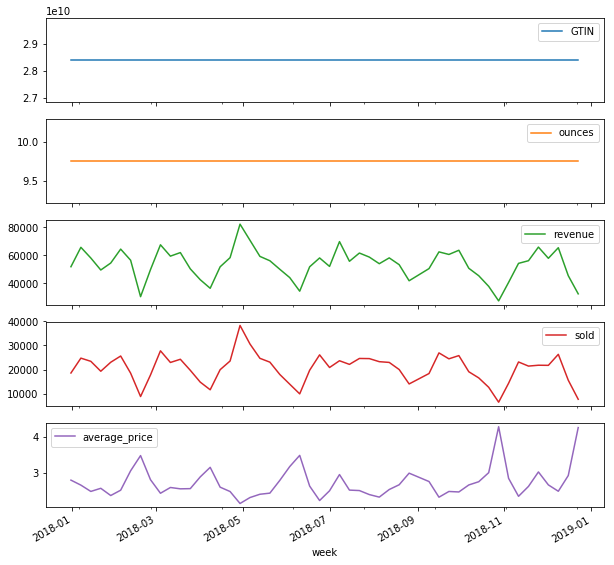

In [35]:
import matplotlib.pyplot as plt
small.plot(subplots=True,figsize=(10,10))
plt.show()

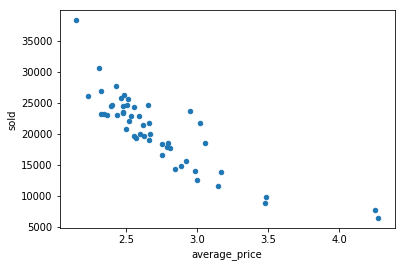

In [52]:
small.plot(x='average_price',y='sold',kind='scatter')

**Q2:** Find the product with the highest average price (unweighted average across the data set) and plot the revenue, units sold, and average price over time.

In [42]:
sales.groupby('GTIN')['average_price'].mean().sort_values(ascending=False).head()

GTIN
28400155871    12.400368
28400155861    11.866575
28400155831    11.680938
28400156251     7.367639
28400156311     7.345541
Name: average_price, dtype: float64

In [44]:
sales.query('GTIN==28400155871').head()

,week,GTIN,description,ounces,revenue,sold,average_price
2144,2018-02-18,28400155871,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASS...,26.375,79.62,6,13.270
2431,2018-02-25,28400155871,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASS...,26.375,79.62,6,13.270
2716,2018-04-01,28400155871,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASS...,26.375,92.89,7,13.270
3005,2018-04-08,28400155871,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASS...,26.375,49.74,4,12.435
3296,2018-04-15,28400155871,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASS...,26.375,27.26,2,13.630


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbeb4c5278>,
      dtype=object)

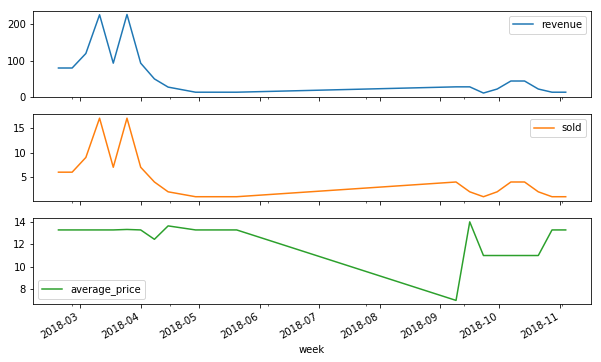

In [51]:
sales.query('GTIN==28400155871')\
    .set_index('week')[['revenue','sold','average_price']]\
    .plot(subplots=True,figsize=(10,6))

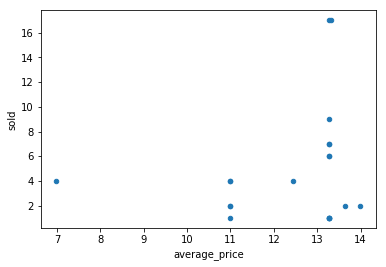

In [53]:
sales.query('GTIN==28400155871')\
    .plot(x='average_price',y='sold', kind='scatter')

## 3. Grouping and Aggregating the Data

In [81]:
products=sales.groupby('GTIN')\
    .agg({'description':'first','ounces':'first','revenue':'sum','sold':'sum'})
products['average_price']=products['revenue']/products['sold']
products=products.sort_values(by='revenue',ascending=False).reset_index()
products.head()

,GTIN,description,ounces,revenue,sold,average_price
0,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,2735406.59,1046022,2.615056
1,28400154431,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASS...,18.00,1862912.68,269550,6.911195
2,28400589891,CHEETOS CHEESE SNACK FLAMIN HOT,8.50,1815165.97,680959,2.665602
3,28400645491,LAYS POTATO CHIP CLASSIC,10.00,1740759.67,665793,2.614566
4,28400154401,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASS...,18.00,1591435.49,230412,6.906912


In [82]:
products.shape

(394, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbe9e14710>]],
      dtype=object)

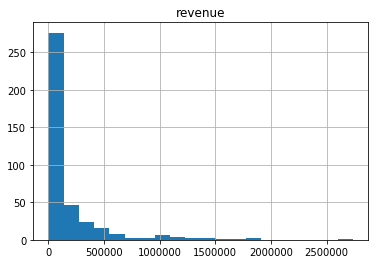

In [83]:
products.hist('revenue',bins=20)

In [84]:
products['revenue_share']=products['revenue']/(products['revenue'].sum())
products.head()

,GTIN,description,ounces,revenue,sold,average_price,revenue_share
0,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,2735406.59,1046022,2.615056,0.042135
1,28400154431,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASS...,18.00,1862912.68,269550,6.911195,0.028696
2,28400589891,CHEETOS CHEESE SNACK FLAMIN HOT,8.50,1815165.97,680959,2.665602,0.027960
3,28400645491,LAYS POTATO CHIP CLASSIC,10.00,1740759.67,665793,2.614566,0.026814
4,28400154401,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASS...,18.00,1591435.49,230412,6.906912,0.024514


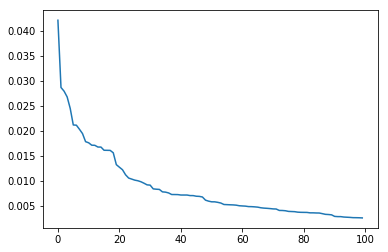

In [85]:
products['revenue_share'][:100].plot()

**Q3:** Perform an analogous analysis as above using the product of number units sold and the weight of each unit, instead of the revenue.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbe994fbe0>]],
      dtype=object)

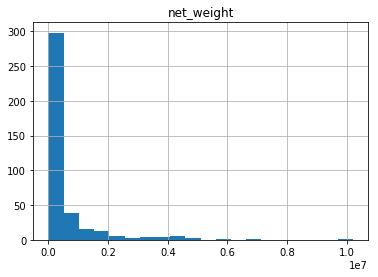

In [140]:
products['net_weight']=products['sold']*products['ounces']
products.hist('net_weight',bins=20)

In [143]:
products['weight_share']=products['net_weight']/(products['net_weight'].sum())
products.head()

,GTIN,description,ounces,revenue,sold,average_price,revenue_share,cheesy,hot,net_weight,weight_share
0,28400642031,DORITOS TORTILLA CHIP NACHO CHEESE,9.75,2735406.59,1046022,2.615056,0.042135,True,False,10198714.5,0.049770
1,28400154431,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASSORTED BAG IN,18.00,1862912.68,269550,6.911195,0.028696,False,False,4851900.0,0.023677
2,28400589891,CHEETOS CHEESE SNACK FLAMIN HOT,8.50,1815165.97,680959,2.665602,0.027960,True,True,5788151.5,0.028246
3,28400645491,LAYS POTATO CHIP CLASSIC,10.00,1740759.67,665793,2.614566,0.026814,False,False,6657930.0,0.032491
4,28400154401,ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASSORTED BAG IN,18.00,1591435.49,230412,6.906912,0.024514,False,False,4147416.0,0.020239


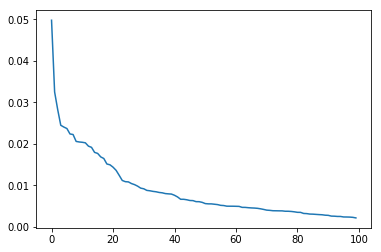

In [153]:
products.sort_values(by='weight_share',ascending=False)\
    .reset_index()['weight_share'][:100].plot()

## 4. Efficiently Analyzing Text

In [90]:
pd.set_option('display.max_colwidth',100)

In [98]:
products['description'][:20]

0                              DORITOS TORTILLA CHIP NACHO CHEESE
1      ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASSORTED BAG IN
2                                 CHEETOS CHEESE SNACK FLAMIN HOT
3                                        LAYS POTATO CHIP CLASSIC
4      ALL FRITO LAY PRODUCTS ASTSS SALTED SNACKS ASSORTED BAG IN
5                                     CHEETOS CHEESE SNACK CHEESE
6                                     CHEETOS CHEESE SNACK CHEESE
7                                DORITOS TORTILLA CHIP COOL RANCH
8               RUFFLES POTATO CHIP ORIGINAL ZERO GRAMS TRANS FAT
9     TOSTITOS SCOOPS TORTILLA CHIP ORIGINAL ZERO GRAMS TRANS FAT
10                         CHEETOS CHEESE SNACK FLAMING HOT LIMON
11           TOSTITOS TORTILLA CHIP ORIGINAL ZERO GRAMS TRANS FAT
12                                      LAYS POTATO CHIP BARBEQUE
13                                       LAYS POTATO CHIP CLASSIC
14                                   RUFFLES POTATO CHIP ORIGINAL
15        

In [92]:
products['description'].str.contains('CHEESE').head()

0     True
1    False
2     True
3    False
4    False
Name: description, dtype: bool

In [99]:
sum(products['description'].str.contains('CHEESE'))

73

In [100]:
products['cheesy']=products['description'].str.contains('CHEESE') \
                | products['description'].str.contains('CHEDDAR')
sum(products['cheesy'])

101

In [120]:
byCheese=products.groupby('cheesy')\
    .aggregate({'GTIN':'count','ounces':'mean','revenue':'mean','sold':'mean','revenue_share':'mean'})

byCheese

,GTIN,ounces,revenue,sold,revenue_share
cheesy,,,,,
False,293,7.923791,160422.728532,54142.935154,0.002471
True,101,5.794109,177384.337129,69661.742574,0.002732


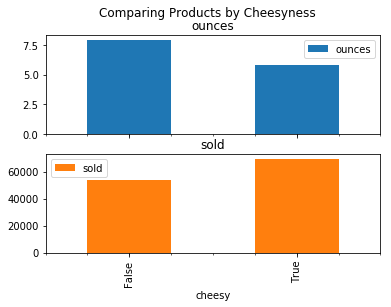

In [139]:
byCheese[['ounces','sold']].plot(kind='bar',subplots=True,title='Comparing Products by Cheesyness')
plt.show()

**Q4:** Perform a similar analysis by searching for the words `"HOT"` or `"FLAM"` in the product description, and comparing the sales volume and weight of products with names containing these words and those that do not.

In [101]:
products['hot']=products['description'].str.contains('HOT') \
                | products['description'].str.contains('FLAM')
sum(products['hot'])

40

In [131]:
bySpicy=products.groupby('hot')\
    .aggregate({'GTIN':'count','ounces':'mean','revenue':'mean','sold':'mean','revenue_share':'mean'})
bySpicy

,GTIN,ounces,revenue,sold,revenue_share
hot,,,,,
False,354,7.618844,165257.161921,57025.29661,0.002546
True,40,5.237500,160466.054750,67819.02500,0.002472


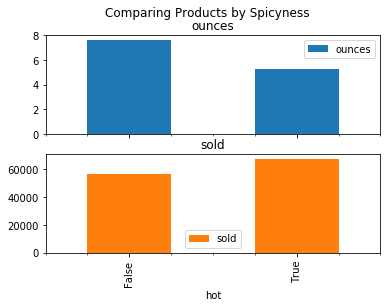

In [138]:
bySpicy[['ounces','sold']].plot(kind='bar',subplots=True,title='Comparing Products by Spicyness')
plt.show()

In [101]:
products['hot']=products['description'].str.contains('HOT') \
                | products['description'].str.contains('FLAM')
sum(products['hot'])

40